# Brain Tumor Type Classification from MRI Image Scans

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from PIL import Image
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
train_dir = '/kaggle/input/brain-tumor-mri-dataset/Training/'
test_dir = '/kaggle/input/brain-tumor-mri-dataset/Testing/'
# train_paths = []
# train_labels = []
# test_paths = []
# test_labels = []
# dset = []
# for label in os.listdir(train_dir):
#     for image in os.listdir(train_dir+label):
#         train_paths.append(train_dir+label+'/'+image)
#         train_labels.append(label)
# # for label in os.listdir(test_dir):
# #     for image in os.listdir(test_dir+label):
# #         test_paths.append(test_dir+label+'/'+image)
# #         test_labels.append(label)  
# for path, directory, files in os.walk(test_dir):
#     for file in files:
#         if '.jpg' in file:
#             dset.append((os.path.join(path, file), path.split('/')[-1]))
# test_df = pd.DataFrame(dset, columns=['folder', 'file'])
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers
from tensorflow.keras.metrics import Precision
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Data Formatting & Processing

In [3]:
class_num = 4
batch_size=500
Epochs=20
train_data, validation_data = tf.keras.utils.image_dataset_from_directory(directory=train_dir, label_mode='categorical', validation_split=0.2, subset='both', shuffle=True, seed=123, batch_size=batch_size)
test_data = tf.keras.utils.image_dataset_from_directory(directory=test_dir, label_mode='categorical', shuffle=True, batch_size=batch_size)

Found 5712 files belonging to 4 classes.
Using 4570 files for training.
Using 1142 files for validation.
Found 1311 files belonging to 4 classes.


In [4]:
train_data = train_data.map(lambda x,y: (x/255, y))
validation_data = validation_data.map(lambda x,y: (x/255, y))
test_data = test_data.map(lambda x,y: (x/255, y))

# Data Augmentation

In [5]:
data_augmentation = Sequential([
    layers.experimental.preprocessing.RandomFlip(mode="horizontal"),
    layers.experimental.preprocessing.RandomContrast(factor=0.2)
])

# Defining Model

In [6]:
model = keras.Sequential([
    layers.InputLayer(input_shape=(256, 256, 3), batch_size=batch_size),
    
    
    layers.Conv2D(filters=32, kernel_size=3, strides=1, activation='relu', padding="same"),
    layers.MaxPool2D(pool_size=(3,3)),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=64, kernel_size=3, strides=1, activation='relu', padding="same"),
    layers.MaxPool2D(pool_size=(3,3)),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=128, kernel_size=3, strides=1, activation='relu', padding="same"),
    layers.MaxPool2D(pool_size=(3,3)),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=256, kernel_size=3, strides=1, activation='relu', padding="same"),
    layers.MaxPool2D(pool_size=(3,3)),
    layers.BatchNormalization(),
    
    layers.GlobalAveragePooling2D(),
    layers.Dense(batch_size*3, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(batch_size*2, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(batch_size, activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(class_num, activation="softmax")
    ])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (500, 256, 256, 32)       896       
                                                                 
 max_pooling2d (MaxPooling2  (500, 85, 85, 32)         0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (500, 85, 85, 32)         128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (500, 85, 85, 64)         18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (500, 28, 28, 64)         0         
 g2D)                                                            
                                                      

In [7]:
model.compile(loss = "categorical_crossentropy", optimizer='adam', metrics=['accuracy', Precision()])

# Model Training

In [8]:
history = model.fit(train_data, epochs=Epochs, validation_data=validation_data, shuffle=True)

Epoch 1/20
10/10 [==============================] - 31s 799ms/step - loss: 0.8787 - accuracy: 0.7048 - precision: 0.7389 - val_loss: 1.2523 - val_accuracy: 0.4282 - val_precision: 0.9375
Epoch 2/20
10/10 [==============================] - 10s 504ms/step - loss: 0.4035 - accuracy: 0.8499 - precision: 0.8601 - val_loss: 1.3100 - val_accuracy: 0.3074 - val_precision: 1.0000
Epoch 3/20
10/10 [==============================] - 9s 496ms/step - loss: 0.3015 - accuracy: 0.8882 - precision: 0.8941 - val_loss: 1.3374 - val_accuracy: 0.3783 - val_precision: 0.0000e+00
Epoch 4/20
10/10 [==============================] - 9s 497ms/step - loss: 0.3080 - accuracy: 0.8829 - precision: 0.8913 - val_loss: 1.3243 - val_accuracy: 0.3144 - val_precision: 0.3537
Epoch 5/20
10/10 [==============================] - 10s 495ms/step - loss: 0.2529 - accuracy: 0.9028 - precision: 0.9072 - val_loss: 1.3727 - val_accuracy: 0.3179 - val_precision: 0.6685
Epoch 6/20
10/10 [==============================] - 9s 513ms/st

# Training Results

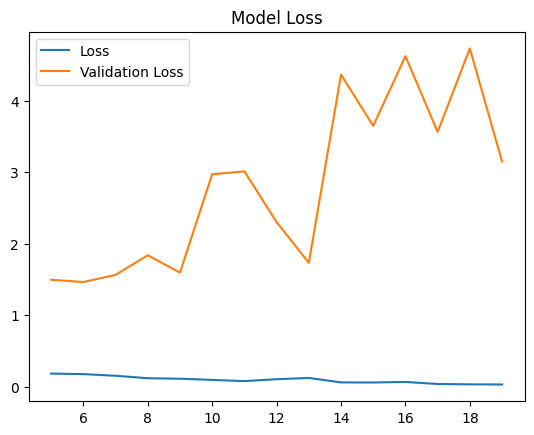

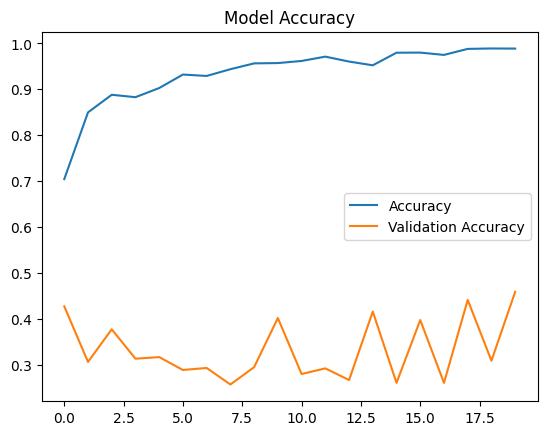

In [9]:
import matplotlib.pyplot as plt

plt.plot(range(5, Epochs), history.history['loss'][5:], label='Loss')
plt.plot(range(5, Epochs), history.history['val_loss'][5:], label='Validation Loss')
plt.title('Model Loss')
plt.legend()
plt.show()
plt.plot(range(Epochs), history.history['accuracy'], label='Accuracy')
plt.plot(range(Epochs), history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

# Model Evaluation

In [10]:
model.evaluate(test_data, batch_size=batch_size)

3/3 [==============================] - 6s 621ms/step - loss: 3.2196 - accuracy: 0.4455 - precision: 0.4458


[3.2196409702301025, 0.4454614818096161, 0.4458015263080597]